In [56]:
# cv2.addWeighted will not work if images are of different sizes
# Formula for addWeighted is new_pixel = alpha*img1 + beta*img2 + gamma
# where:
#     1. alpha, beta and gamma are some constants
#     2. img1 is source 1
#     3. img2 is source 2
#     4. alpha and beta will decide the intensity of img1 or img2 in new blended image
#     5. gamma gives brightness to the image(observed)
# blending means img1 will be pasted on top of img2 but there will be no background of img1. It is just like appling watermark of img1 to img2
# pasting means puting img1 on top of img2 without any modification. This require only Numpy.

# Blending

In [197]:
import numpy as np

In [57]:
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread('flower.jpg')
img2 = cv2.imread('image.jpg')

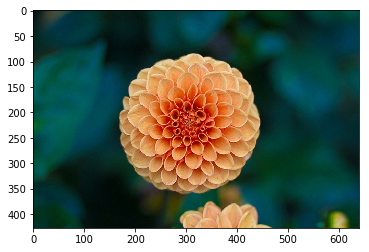

In [58]:
plt.imshow(img1)

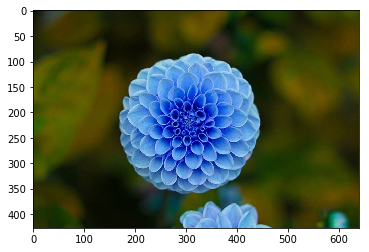

In [59]:
plt.imshow(img2)

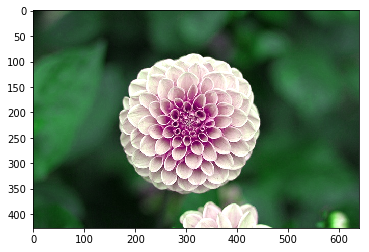

In [60]:
blended = cv2.addWeighted(img1, 0.8, img2, 0.6, 1)
plt.imshow(blended)

# Pasting

In [91]:
img2 = cv2.imread('image.jpg')

In [121]:
img1.shape

(427, 640, 3)

In [127]:
img1 = cv2.imread('flower.jpg')
img1 = cv2.resize(img1, (900, 900))

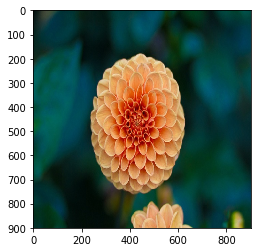

In [128]:
plt.imshow(img1)

In [129]:
img2.shape

(427, 640, 3)

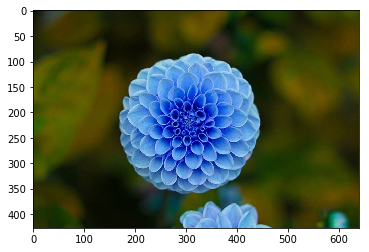

In [130]:
plt.imshow(img2)

In [150]:
# Taking img2 as source
# img1 as destination

In [136]:
img1[200:775, 220:600] = img2[75:375, 175:450]

ValueError: could not broadcast input array from shape (300,275,3) into shape (575,380,3)

In [142]:
img1[300:700, 220:600].shape

(400, 380, 3)

In [147]:
img2[27:427, 175:555].shape

(400, 380, 3)

In [153]:
# shape should match for pasting

In [148]:
img1[300:700, 220:600] = img2[27:427, 175:555]

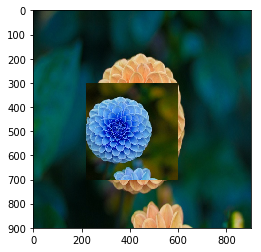

In [149]:
plt.imshow(img1)

# Blending image of different sizes

In [174]:
img1 = cv2.imread('flower.jpg')
img2 = cv2.imread('image.jpg')

In [175]:
img1.shape == img2.shape

True

In [176]:
img1.shape

(427, 640, 3)

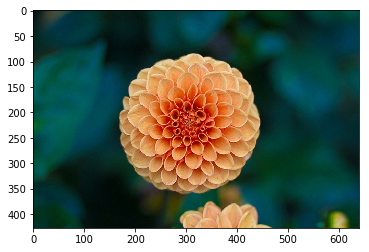

In [177]:
plt.imshow(img1)

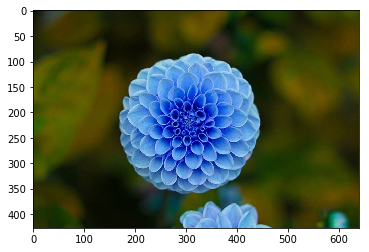

In [178]:
plt.imshow(img2)

In [179]:
# source is img2
# destination is img1

# roi = region of intrest is selected from destination image and the source image is blended over that roi

In [180]:
roi = img1[75:375, 175:475]

In [181]:
roi.shape

(300, 300, 3)

In [182]:
img2 = cv2.resize(img2, (400, 400))

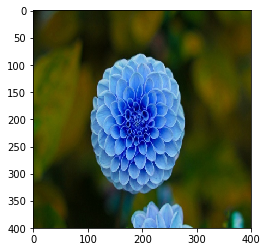

In [183]:
plt.imshow(img2)

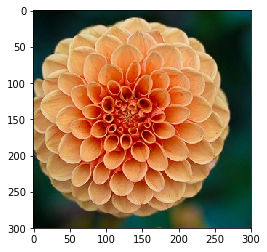

In [168]:
plt.imshow(roi)

In [184]:
img2 = img2[75:275, 100:275]

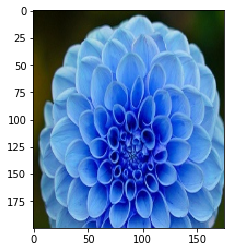

In [185]:
plt.imshow(img2)

In [186]:
img2n = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

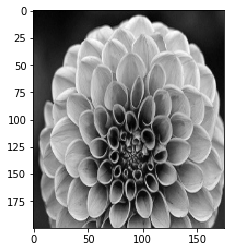

In [188]:
plt.imshow(img2n, cmap='gray')

In [203]:
# we create mask of source image
# invert the color of the image
maskinv = cv2.bitwise_not(img2n)

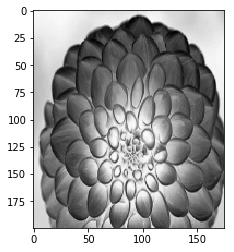

In [204]:
plt.imshow(maskinv, cmap = 'gray')

In [205]:
maskinv.max()

247

In [206]:
maskinv.min()

44

In [207]:
maskinv.shape

(200, 175)

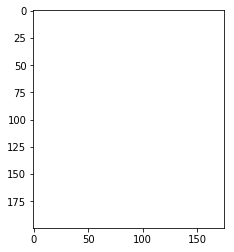

In [267]:
plt.imshow(np.full(img2.shape, 255, dtype = np.uint8))

In [268]:
# now we want this maskinv in 3 channel so,
whitebackground = np.full(img2.shape, 255, np.uint8)

In [269]:
whitebackground.shape

(200, 175, 3)

In [270]:
maskinv.shape

(200, 175)

In [271]:
# testing
a = np.array([[[1,0,0,1,1]]])
b = np.array([[[1,1,0,1,0]]])
masktest = np.array([[1,1,1,1,1]])

cv2.bitwise_or(a, b, mask = None)

array([[[1, 1, 0, 1, 1]]], dtype=int32)

In [279]:
bk = cv2.bitwise_or(whitebackground, whitebackground,mask = maskinv)

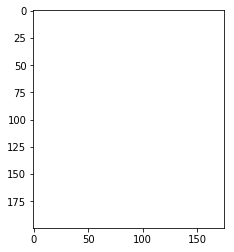

In [280]:
plt.imshow(bk)

In [262]:
bk.shape

(200, 175, 3)

In [263]:
img1.shape

(427, 640, 3)

In [264]:
img2.shape

(200, 175, 3)

In [265]:
roi.shape

(300, 300, 3)

### not complete